In [1]:
#******************** Codsoft Data Science Internship ***************

#Task-3 Iris Flower Detection

# Author : Hiten Khemani
# Batch  : May A50
# Domain : Data Science
# Goal   : To develop a model that can classify iris flower into different species based on their sepal and petal measurements


In [2]:
# Importing Libaries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
# Loading existing dataset from libary

df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# changing the species to numeric data in dataset with factorizing

df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# checking the dataset 

df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [6]:
# Checking for Null Values

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

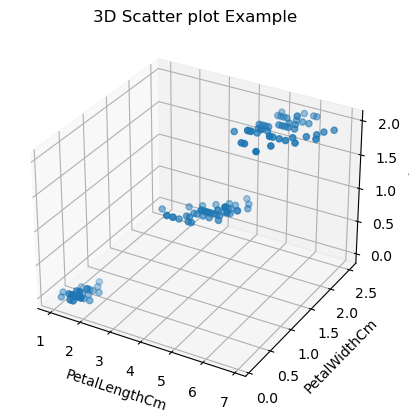

In [7]:
# Plotting 3d Scatter graph for understanding of species on base on petal measurements 

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('species')
plt.title('3D Scatter plot Example')
plt.show()

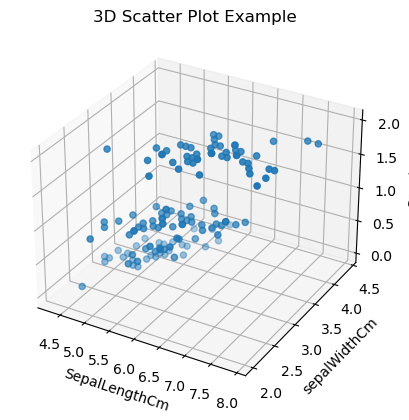

In [8]:
# Plotting 3d Scatter graph for understanding of  on species by sepal measurements

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('sepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

#from sepal we cant determine the species

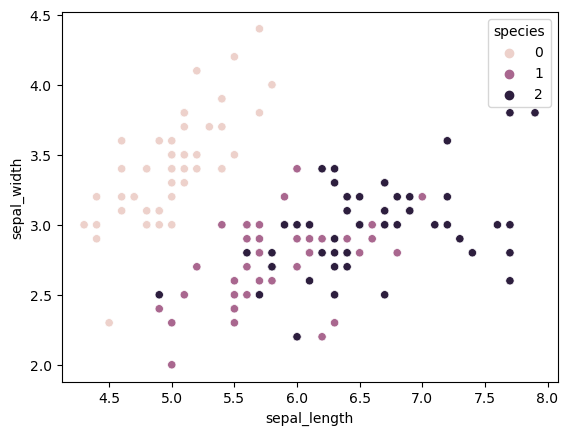

In [9]:
# lets try another graph for  better understanding
# sepal

sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species");

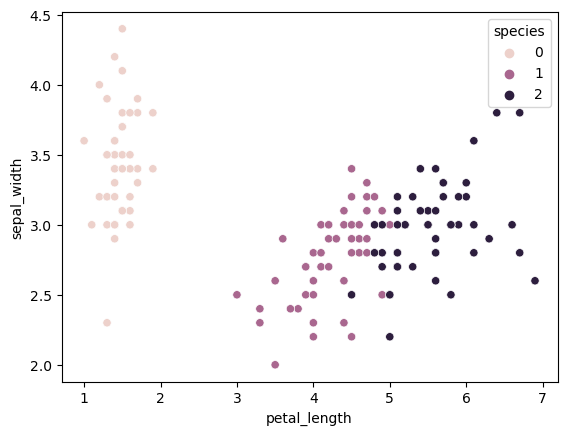

In [10]:
# lets try another graph for  better understanding
# petal

sns.scatterplot(data=df,x="petal_length",y="sepal_width",hue="species");

In [11]:
# Based on sepal we cant define species so lets take petal as parameter for identifying species

k_rng = range(1,10)
sse=[]
 
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [12]:
# sum of squarred errors
sse


[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.477123363965468,
 13.91690875790876,
 11.03633387775173,
 9.21530102264885,
 7.615402244955953,
 6.456494541406307]

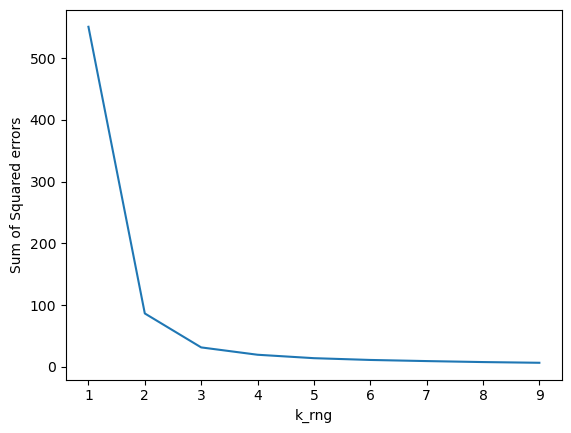

In [13]:
# plotting 2d line graph

plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

In [14]:
# Prediction on base of petal lengths and dividing the results in clusters into 3 as identified or determined species on base of prediction

km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiten\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Adding the cluster predicted into dataframe 

df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [16]:
# Creating a Matrix for understanding of the The cluster and species relation

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species,df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

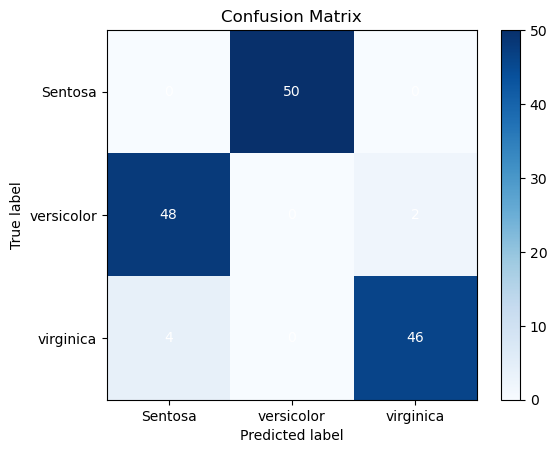

In [18]:
# Visualization of the matrix with help of heat graph

true_labels = df.species
predicted_labels = df.cluster

cm = confusion_matrix(true_labels,predicted_labels)
class_labels = ['Sentosa','versicolor','virginica']
#plot confusion matrix
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
#fill matrix with value


for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='White')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [19]:
# the model can successfuly predict the species of iris flower mostly based on petal measurements